In [645]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [646]:
df = pd.read_excel("/content/Class_2023_10_18__01_49_QZ_Movies Movies & Movies.xlsx")

In [647]:
df.head()

,Student Name,"Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like thriller movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like animated movies?","On average, how many movies you watch on a single week",Which of the following movies you'd say is your preferred?,Describe yourself with 5 adjectives. For example:- Capable- Friendly- Happy- Sociable- Slow
0,Aiman Anwer,7.5,6.5,8.5,8.5,10.0,10.0,3.5,1.5,8.5,9.5,9.5,1.5,4.5,C. 3) Two movies a week,D. Spiderman\nE. Mulan\nF. Hamilton\nG. Jurass...,- Friendly\n- Motivated\n- Sociable\n- Energet...
1,Aman,7,5,3.0,8.0,3.0,1.0,8.0,9.0,7.0,1.0,10.0,5.0,4.0,A. 1) zero movies. I don't watch movies,D. Spiderman,- Punctual\n- Disciplined \n- Introvert\n- Fas...
2,Aman Sran,4.6,7.4,10.0,8.7,7.5,3.2,3.4,4.5,8.5,6.7,8.4,9.5,2.4,B. 2) One movie a week,B. Shrek,"Sociable, Friendly, Empathetic, Passionate, Co..."
3,Amarthya,7,8,9.0,6.0,7.0,7.0,7.0,1.0,7.0,7.0,8.0,6.0,8.0,B. 2) One movie a week,G. Jurassic Park,AI-driven\nInformative\nMultifunctional\nnonch...
4,Ananta Verma,3.5,7.8,10.0,4.2,6.9,5.5,9.8,6.2,8.0,4.0,8.8,2.0,8.2,B. 2) One movie a week,D. Spiderman,-calm\n-kind\n-introvert\n-passionate\n-funny


# Data Exploration

In [648]:
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 85
Number of columns: 17


In [651]:
df.columns

Index(['Student Name',
       'Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)',
       'Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)',
       'Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)',
       'Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)',
       'Using a scale 1 to 10, how much do you like drama movies?',
       'Using a scale 1 to 10, how much do you like fantasy movies?',
       'Using a scale 1 to 10, how much do you like science fiction movies?',
       'Using a scale 1 to 10, how much do you like horror movies?',
       'Using a scale 1 to 10, how much do you like mystery movies?',
       'Using a scale 1 to 10, how much do you like romance movies?',
       'Using a scale 1 to 10, how much do you like thriller movies?',
       'Using a scale 1 to 10, how much do you like documentary movies?',
       'Using a scale 1 to 10

All the column names contain symbols, numbers and unwanted data, need to be cleaned.

In [649]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 17 columns):
 #   Column                                                                                       Non-Null Count  Dtype  
---  ------                                                                                       --------------  -----  
 0   Student Name                                                                                 85 non-null     object 
 1   Using a scale 1 to 10, how much do you like action movies? (use decimals, e.g. 4.2)          85 non-null     object 
 2   Using a scale 1 to 10, how much do you like adventure movies? (use decimals, e.g. 4.2)       84 non-null     object 
 3   Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)          83 non-null     float64
 4   Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)           83 non-null     float64
 5   Using a scale 1 to 10, how much do you

We have Null values in 15 columns both object and float type data. so we need replace null values with respective data.

In [650]:
df.describe()

,"Using a scale 1 to 10, how much do you like comedy movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like crime movies? (use decimals, e.g. 4.2)","Using a scale 1 to 10, how much do you like drama movies?","Using a scale 1 to 10, how much do you like fantasy movies?","Using a scale 1 to 10, how much do you like science fiction movies?","Using a scale 1 to 10, how much do you like horror movies?","Using a scale 1 to 10, how much do you like mystery movies?","Using a scale 1 to 10, how much do you like romance movies?","Using a scale 1 to 10, how much do you like thriller movies?","Using a scale 1 to 10, how much do you like documentary movies?","Using a scale 1 to 10, how much do you like animated movies?"
count,83.000000,83.000000,83.000000,82.000000,82.000000,82.000000,81.000000,82.000000,81.000000,82.000000,81.000000
mean,8.423240,1212.749639,6.855301,7.271220,8.387195,6.748170,7.993827,7.184390,20.445556,6.590122,7.052963
std,1.542735,10975.545086,2.331890,2.351857,1.794819,2.947948,1.817835,3.123678,110.221002,2.497070,2.567645
min,3.000000,2.500000,2.200000,0.000000,2.000000,0.000000,1.200000,-10.000000,1.000000,1.000000,0.000000
25%,7.900000,7.250000,5.000000,6.275000,8.000000,5.000000,7.500000,6.125000,7.800000,5.000000,5.000000
50%,8.900000,8.500000,7.000000,7.750000,8.800000,7.550000,8.250000,7.850000,9.000000,7.000000,7.900000
75%,9.950000,9.900000,8.550000,9.000000,9.875000,9.000000,9.000000,9.425000,10.000000,8.150000,9.000000
max,10.000000,100000.000000,12.000000,10.000000,11.000000,10.000000,10.000000,10.000000,1000.000000,10.000000,10.500000


As our data contains data greater than 0 and less than 10. There are outlier in 5 Columns which can be derived from min and max values in each column.

# Data Cleaning

In [652]:
df.columns = df.columns.str.replace(r'Using a scale 1 to 10, how much do you like ', '')
df.columns = df.columns.str.replace(r'(use decimals, e.g. 4.2)', '')
df.columns = df.columns.str.replace(r'?', '')
df.columns = df.columns.str.replace(r'On average, how many movies you watch on a single week', 'Average Movies per Week')
df.columns = df.columns.str.replace(r"Which of the following movies you'd say is your preferred", 'Best Movies')
df.columns = df.columns.str.replace(r"Describe yourself with 5 adjectives. For example:- Capable- Friendly- Happy- Sociable- Slow", 'Adjective')
df.columns = df.columns.str.replace(r'(', '')
df.columns = df.columns.str.replace(r')', '')
df.columns = df.columns.str.replace(r' ', '_')

All the symbols and unwanted data is removed from all the column names.

In [653]:
df.info()

Index(['Student_Name', 'action_movies_', 'adventure_movies_', 'comedy_movies_',
       'crime_movies_', 'drama_movies', 'fantasy_movies',
       'science_fiction_movies', 'horror_movies', 'mystery_movies',
       'romance_movies', 'thriller_movies', 'documentary_movies',
       'animated_movies', 'Average_Movies_per_Week', 'Best_Movies',
       'Adjective'],
      dtype='object')

Though data 'action_movies' and 'adventure_movies' contain rating from 1 to 10, butdata is showing objective type. we will verify data in each column to understand better.

In [656]:
df['action_movies_'].unique()

array(['7.5', '7', '4.6', '3.5', '9', '10', '8.0', '6', '8.5', '9.5',
       '6.3', '4.2', '5', '8', '10.0', '8.2', '9.8', '6.7',
       'who knows man', '6.5', '7.8', '9.7', '9.9', '5.6', '2.1'],
      dtype=object)

We have one objective type data we will replace data with nan, convert object type to numeric type and then replace the data with mean.

In [657]:
df['adventure_movies_'].unique()

array(['6.5', '5', '7.4', '8', '7.8', '7.5', '9', '5.5', '8.4', '6',
       '8.5', '7', '9.2', '8.3', '3', '10', '6.8', '6.3', '6.4', '10.1',
       '9.3', '9.58', '8.9', '7.9', 'idk', '6.1', '8.2', nan, '7.2',
       '5.3', '9.9'], dtype=object)

We have one objective data and one null value. we will replace data with nan, convert object type to numeric type and then replace the data with mean.

In [658]:
df['action_movies_'] = df['action_movies_'].replace('who knows man', np.nan)
df['action_movies_'] = pd.to_numeric(df['action_movies_'])


mean_value = df['action_movies_'].mean()
df['action_movies_'].fillna(mean_value, inplace=True)

'Average_Movies_per_Week', 'Adjective', 'Best_Movies' columns data have null values we will first fill null values by method "ffill".

In [661]:
df['Average_Movies_per_Week'].fillna( method ='ffill', inplace = True)
df['Best_Movies'].fillna( method ='ffill', inplace = True)
df['Adjective'].fillna( method ='ffill', inplace = True)

Fill all float type column data with mean of each column.

In [662]:
col = ['comedy_movies_',
       'crime_movies_', 'drama_movies', 'fantasy_movies',
       'science_fiction_movies', 'horror_movies', 'mystery_movies',
       'romance_movies', 'thriller_movies', 'documentary_movies',
       'animated_movies']

for i in col:
  df[i].fillna(df[i].mean(),inplace=True)

In [663]:
X = df['Best_Movies']

In [666]:
df['Adjective'] = df['Adjective'].str.replace('\n- ', ', ',).str.strip('- ')
df['Adjective'] = df['Adjective'].str.replace('\n\n- ', ', ').str.strip('- ')
df['Adjective'] = df['Adjective'].str.replace('\n', ', ')

In [667]:
df[['Ad1', 'Ad2', 'Ad3', 'Ad4', 'Ad5']] = df['Adjective'].str.split(',', 4,expand=True)
df = df.drop('Adjective', axis=1)

In [668]:
df['Ad1'] = df['Ad1'].replace('I am very friendly and capable of doing things.', np.nan)
df['Ad1'] = df['Ad1'].replace('Hi', np.nan)

In [669]:
df['Ad1'].fillna( method ='ffill', inplace = True)
df['Ad2'].fillna( method ='ffill', inplace = True)
df['Ad3'].fillna( method ='ffill', inplace = True)
df['Ad4'].fillna( method ='ffill', inplace = True)
df['Ad5'].fillna( method ='ffill', inplace = True)

In [670]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Student_Name             85 non-null     object 
 1   action_movies_           85 non-null     float64
 2   adventure_movies_        85 non-null     float64
 3   comedy_movies_           85 non-null     float64
 4   crime_movies_            85 non-null     float64
 5   drama_movies             85 non-null     float64
 6   fantasy_movies           85 non-null     float64
 7   science_fiction_movies   85 non-null     float64
 8   horror_movies            85 non-null     float64
 9   mystery_movies           85 non-null     float64
 10  romance_movies           85 non-null     float64
 11  thriller_movies          85 non-null     float64
 12  documentary_movies       85 non-null     float64
 13  animated_movies          85 non-null     float64
 14  Average_Movies_per_Week  85 

In [671]:
df.Average_Movies_per_Week.unique()

array(['C. 3) Two movies a week',
       "A. 1) zero movies. I don't watch movies",
       'B. 2) One movie a week',
       "A. 1) zero movies. I don't watch movies\nB. 2) One movie a week",
       'D. 4) Three to four movies a week\nE. 5) More than 4 movies a week',
       'D. 4) Three to four movies a week',
       'E. 5) More than 4 movies a week',
       'B. 2) One movie a week\nC. 3) Two movies a week',
       'C. 3) Two movies a week\nD. 4) Three to four movies a week\nE. 5) More than 4 movies a week'],
      dtype=object)

The data in 'Average_Movies_per_Week' should one option in each instance but some instances have multiple options. we will select the first option in multiple options. We will replace the data as selected option.

In [672]:
df['Average_Movies_per_Week'] = df['Average_Movies_per_Week'].replace("C. 3) Two movies a week", 'C')
df['Average_Movies_per_Week'] = df['Average_Movies_per_Week'].replace("A. 1) zero movies. I don't watch movies", 'A')
df['Average_Movies_per_Week'] = df['Average_Movies_per_Week'].replace("B. 2) One movie a week", 'B')
df['Average_Movies_per_Week'] = df['Average_Movies_per_Week'].replace("A. 1) zero movies. I don't watch movies\nB. 2) One movie a week", 'A')
df['Average_Movies_per_Week'] = df['Average_Movies_per_Week'].replace("D. 4) Three to four movies a week\nE. 5) More than 4 movies a week", 'D')
df['Average_Movies_per_Week'] = df['Average_Movies_per_Week'].replace("D. 4) Three to four movies a week", 'D')
df['Average_Movies_per_Week'] = df['Average_Movies_per_Week'].replace("E. 5) More than 4 movies a week", 'E')
df['Average_Movies_per_Week'] = df['Average_Movies_per_Week'].replace("B. 2) One movie a week\nC. 3) Two movies a week", 'B')
df['Average_Movies_per_Week'] = df['Average_Movies_per_Week'].replace("C. 3) Two movies a week\nD. 4) Three to four movies a week\nE. 5) More than 4 movies a week", 'C')

In [673]:
df.Average_Movies_per_Week.unique()

array(['C', 'A', 'B', 'D', 'E'], dtype=object)

Now we will try to understand Most preferred movie by find the text of movie in all data.

In [675]:
df['Spiderman'] = df['Best_Movies'].str.contains("Spiderman")
df['Spiderman'] = df['Spiderman'].replace({True: 'Yes', False: 'No'})

df['Gladiator'] = df['Best_Movies'].str.contains("Gladiator")
df['Gladiator'] = df['Gladiator'].replace({True: 'Yes', False: 'No'})

df['Jurassic Park'] = df['Best_Movies'].str.contains("Jurassic Park")
df['Jurassic Park'] = df['Jurassic Park'].replace({True: 'Yes', False: 'No'})

df['Star Wars'] = df['Best_Movies'].str.contains("Star Wars")
df['Star Wars'] = df['Star Wars'].replace({True: 'Yes', False: 'No'})

df['Mulan'] = df['Best_Movies'].str.contains("Mulan")
df['Mulan'] = df['Mulan'].replace({True: 'Yes', False: 'No'})

df['Shrek'] = df['Best_Movies'].str.contains("Shrek")
df['Shrek'] = df['Shrek'].replace({True: 'Yes', False: 'No'})

df['Hamilton'] = df['Best_Movies'].str.contains("Hamilton")
df['Hamilton'] = df['Hamilton'].replace({True: 'Yes', False: 'No'})

print(f"Spiderman Movie Count: {df['Spiderman'].value_counts().get('Yes', 0)}, Per: {df['Spiderman'].value_counts().get('Yes', 0)/170}")
print(f"Gladiator Movie Count: {df['Gladiator'].value_counts().get('Yes', 0)}, Per: {df['Gladiator'].value_counts().get('Yes', 0)/170}")
print(f"Jurassic Park Movie Count: {df['Jurassic Park'].value_counts().get('Yes', 0)}, Per: {df['Jurassic Park'].value_counts().get('Yes', 0)/170}")
print(f"Star Wars Movie Count: {df['Star Wars'].value_counts().get('Yes', 0)}, Per: {df['Star Wars'].value_counts().get('Yes', 0)/170}")
print(f"Mulan Movie Count: {df['Mulan'].value_counts().get('Yes', 0)}, Per: {df['Mulan'].value_counts().get('Yes', 0)/170}")
print(f"Sherk Movie Count: {df['Shrek'].value_counts().get('Yes', 0)}, Per: {df['Shrek'].value_counts().get('Yes', 0)/170}")
print(f"Hamilton Movie Count: {df['Hamilton'].value_counts().get('Yes', 0)}, Per: {df['Hamilton'].value_counts().get('Yes', 0)/170}")

df = df.drop('Mulan',axis=1)
df = df.drop('Star Wars',axis=1)
df = df.drop('Jurassic Park',axis=1)
df = df.drop('Gladiator',axis=1)
df = df.drop('Spiderman',axis=1)
df = df.drop('Shrek',axis=1)
df = df.drop('Hamilton',axis=1)

Spiderman Movie Count: 51, Per: 0.3
Gladiator Movie Count: 22, Per: 0.12941176470588237
Jurassic Park Movie Count: 31, Per: 0.18235294117647058
Star Wars Movie Count: 30, Per: 0.17647058823529413
Mulan Movie Count: 15, Per: 0.08823529411764706
Sherk Movie Count: 14, Per: 0.08235294117647059
Hamilton Movie Count: 7, Per: 0.041176470588235294


"SpiderMan" Movie is selected most number of times, so it is the most preferred movie with percentage of 30%.

Now, we will clean 'Best_Movies' column data.

In [674]:
df['Best_Movies'].value_counts()

D. Spiderman                                                                                   15
C. Gladiator                                                                                    8
G. Jurassic Park                                                                                7
A. Star Wars                                                                                    6
A. Star Wars\nB. Shrek\nD. Spiderman\nG. Jurassic Park                                          4
D. Spiderman\nG. Jurassic Park                                                                  4
A. Star Wars\nD. Spiderman                                                                      4
C. Gladiator\nD. Spiderman                                                                      4
E. Mulan                                                                                        4
B. Shrek                                                                                        4
A. Star Wars\nD. Spi

Split the column data and save first preferred movie in a new column data and drop the old column.

In [676]:
df['Preferred_Movie'] = df['Best_Movies'].str.split('\n').str[0]
df = df.drop('Best_Movies',axis=1)

Now, Encode all the objective column into labels based on unique data in each column.

In [677]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['Average_Movies_per_Week']= label_encoder.fit_transform(df['Average_Movies_per_Week'])
df['Ad1']= label_encoder.fit_transform(df['Ad1'])
df['Ad2']= label_encoder.fit_transform(df['Ad2'])
df['Ad3']= label_encoder.fit_transform(df['Ad3'])
df['Ad4']= label_encoder.fit_transform(df['Ad4'])
df['Ad5']= label_encoder.fit_transform(df['Ad5'])
df['Preferred_Movie']= label_encoder.fit_transform(df['Preferred_Movie'])

We will be trying the predict the Prefeered movie based on remaining values, so we will remeber the labeling of 'Preferred_Movies'

In [678]:
encoded_labels = label_encoder.fit_transform(df['Preferred_Movie'])
label_to_code = {label: code for label, code in zip(df['Preferred_Movie'], encoded_labels)}


for label, code in label_to_code.items():
    print(f"Label: {label} | Code: {code}")

Label: 3 | Code: 3
Label: 1 | Code: 1
Label: 6 | Code: 6
Label: 0 | Code: 0
Label: 4 | Code: 4
Label: 2 | Code: 2
Label: 5 | Code: 5


Now we will outliers in the data by find the data out of 1 to 10, first we will replace them with nan and then with mean of the column.

In [680]:
columns = ['action_movies_', 'adventure_movies_', 'comedy_movies_',
           'crime_movies_', 'drama_movies', 'fantasy_movies',
           'science_fiction_movies', 'horror_movies', 'mystery_movies',
           'romance_movies', 'thriller_movies', 'documentary_movies',
           'animated_movies']

for i in columns:
    print(df[i][(df[i] > 10) | (df[i] < 0)].index,i)

Int64Index([], dtype='int64') action_movies_
Int64Index([], dtype='int64') adventure_movies_
Int64Index([], dtype='int64') comedy_movies_
Int64Index([41, 51, 65, 83], dtype='int64') crime_movies_
Int64Index([41], dtype='int64') drama_movies
Int64Index([], dtype='int64') fantasy_movies
Int64Index([31, 40], dtype='int64') science_fiction_movies
Int64Index([], dtype='int64') horror_movies
Int64Index([], dtype='int64') mystery_movies
Int64Index([23], dtype='int64') romance_movies
Int64Index([19, 28, 51, 65, 83], dtype='int64') thriller_movies
Int64Index([], dtype='int64') documentary_movies
Int64Index([31], dtype='int64') animated_movies


From index shown we will repca ethem with nan(NULL) value.

In [681]:
df.loc[41,'crime_movies_'] = np.nan
df.loc[51,'crime_movies_'] = np.nan
df.loc[65,'crime_movies_'] = np.nan
df.loc[83,'crime_movies_'] = np.nan
df.loc[41,'drama_movies']= np.nan
df.loc[31,'science_fiction_movies'] = np.nan
df.loc[40,'science_fiction_movies']  = np.nan
df.loc[23,'romance_movies'] = np.nan
df.loc[19,'thriller_movies'] = np.nan
df.loc[28,'thriller_movies'] = np.nan
df.loc[51,'thriller_movies'] = np.nan
df.loc[65,'thriller_movies'] = np.nan
df.loc[83,'thriller_movies'] = np.nan
df.loc[31,'animated_movies'] = np.nan

Replace all null in a column with mean of that column.

In [682]:
for i in df.columns[1:]:
  df[i].fillna(df[i].mean(),inplace=True)

# Dendrogram

In [702]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

X = df.iloc[:,1:4]
scaler = StandardScaler()
X = scaler.fit_transform(X)
P = pd.DataFrame(X)
dist = pdist(P)

Model1 = linkage(dist,method = 'single')

In [703]:
labels = df.Student_Name.unique()

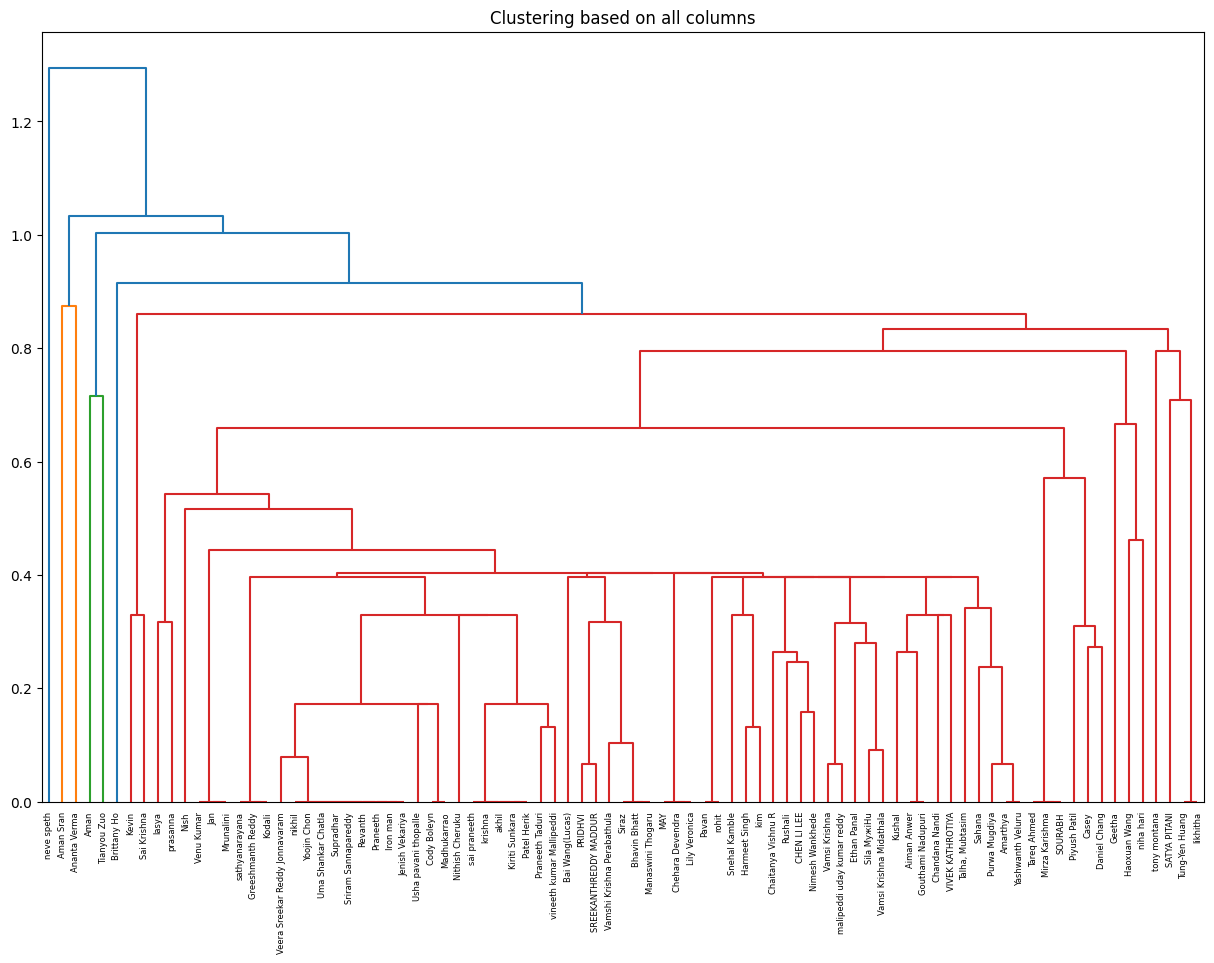

In [704]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
dendrogram(Model1, labels= labels, leaf_rotation=90)
plt.title("Clustering based on all columns")
plt.show()

From the Dendrogram we can understand that **"K=4"**, based on distances of standardised data.

#KMeans

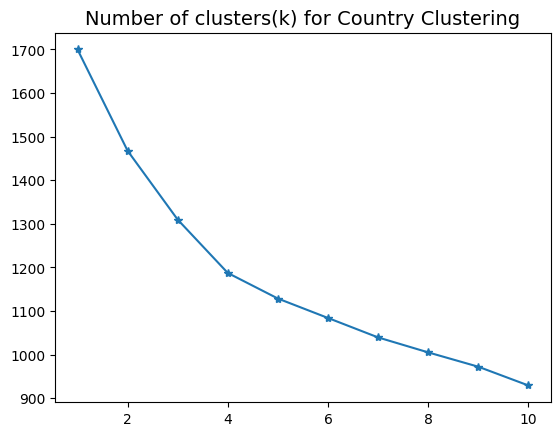

In [691]:
from sklearn.cluster import KMeans

WCSS = []
k = [1,2,3,4,5,6,7,8,9,10]
for j in k:
    kmModel = KMeans(n_clusters=j)
    kmModel = kmModel.fit(X)
    WCSS.append(kmModel.inertia_)

ax = plt.figure().gca()
plt.plot(k, WCSS, '*-')
plt.title('Number of clusters(k) for Country Clustering', fontsize=14)
plt.show()

From scree plot, we there is no fixed K as it is decreasing normally there is no sudden decrease.but at K=4, there is slight high decrease.Optimal **"K = 4"** for KMeans.

# KMeans

In [712]:
from sklearn.metrics import accuracy_score

Y = df['Preferred_Movie'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:4], Y, test_size=0.2, random_state=42)

kmModel = KMeans(n_clusters=4)
kmModel = kmModel.fit(df.iloc[:,1:4])
Accuracy = accuracy_score(y_test,kmModel.predict(X_test)) * 100
Accuracy

29.411764705882355

In [715]:
kmModel.labels_

array([0, 1, 3, 0, 3, 2, 2, 3, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 2, 3, 2, 2,
       0, 2, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 0, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 0, 2, 0, 0,
       2, 0, 0, 2, 2, 2, 2, 3, 1, 0, 3, 3, 2, 0, 2, 2, 2, 1, 2],
      dtype=int32)

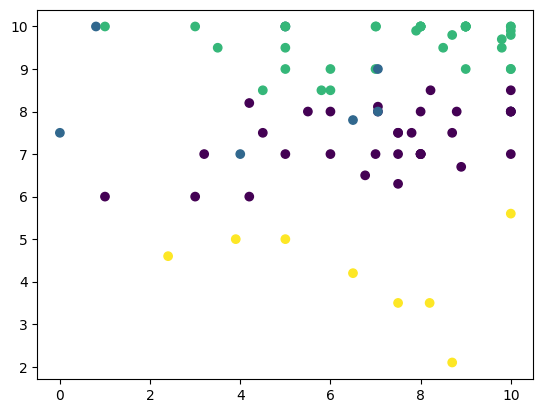

In [713]:
plt.scatter(df['animated_movies'], df['adventure_movies_'], c=kmModel.labels_)
plt.show()

We have trained data with K = 4, obtained labels of data. we will feed to the supervised learning.

# KNN

In [716]:
A = df.iloc[:,1:4]
Y2 = kmModel.labels_
X2_train, X2_test, y2_train, y2_test = train_test_split(A, Y2, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X2_train,y2_train)

predicted = knn.predict(X2_test)
print(predicted)
print(y2_test.reshape(-1,))

[2 0 0 0 0 2 0 2 3 2 0 0 0 2 2 2 0]
[2 0 0 0 0 2 0 2 3 2 0 0 0 2 2 2 0]


We have accurcay of 100% for 1,2,3 neighbours data.

# Prediction

In [701]:
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(df.iloc[:, 1:4], df['Preferred_Movie'].values.reshape(-1, 1))

def KNN_Engine(rating):
    cluster = KNN.predict([rating])[0]
    if cluster == 0:
        favorite_movie = "Star Wars"
    elif cluster == 1:
        favorite_movie = "Shrek"
    elif cluster == 2:
        favorite_movie = "Gladiator"
    elif cluster == 3:
        favorite_movie = "Spiderman"
    elif cluster == 4:
        favorite_movie = "Mulan"
    elif cluster == 5:
        favorite_movie = "Hamilton"
    elif cluster == 6:
        favorite_movie = "Jurassic Park"

    return f"favorite movie cluster is: {favorite_movie}"

We have created function with 3 inputs (first 3 columns of data), and y as 'Preferred_movie' column to predict the movie type based input for 3 columns. The studied labels is used here to understand code and label clustering.

In [717]:
student1 = [5, 7, 3]
student2 = [2, 8, 1]
student3 = [9, 4, 6]
student4 = [0, 7, 8]
student5 = [3, 9, 2]
student6 = [6, 1, 4]
student7 = [7, 0, 5]
student8 = [2, 6, 8]
student9 = [3, 4, 7]
student10 = [1, 9, 0]

students = [student1, student2, student3, student4, student5, student6, student7, student8, student9, student10]

for i, student_data in enumerate(students, 1):
    print(f"KNN Student {i}",KNN_Engine(student_data))

KNN Student 1 favorite movie cluster is: Spiderman
KNN Student 2 favorite movie cluster is: Spiderman
KNN Student 3 favorite movie cluster is: Gladiator
KNN Student 4 favorite movie cluster is: Shrek
KNN Student 5 favorite movie cluster is: Spiderman
KNN Student 6 favorite movie cluster is: Spiderman
KNN Student 7 favorite movie cluster is: Spiderman
KNN Student 8 favorite movie cluster is: Shrek
KNN Student 9 favorite movie cluster is: Shrek
KNN Student 10 favorite movie cluster is: Spiderman


We have predicted the data of 10 members finding there favourite movies.

# Summary
The data is unstructured, wehen we expected one value, there are mix of 3-4 values in single value. we have clean and undestand data better. We have fix the value to single not "Multiple values" in people rating.

Though we got **"K=4"** from both supervised and unsupervised learning, we have clusters of 7 movie options. 4 options from 7 are highly used by all members.As 3 have 7 movies we have clustered data into 7.

**"SpiderMan"** has the most preferred movie suggested from analysis.I recommened to Play this movie for Masters students.

